In [76]:
import pandas as pd
import datetime as dt
import numpy as np

# 1. ***Импорт и анализ таблиц***


In [77]:
#####  1.1. Импортируйте данные в окружение *Jupyter Notebook*.

In [78]:
df_pay = pd.read_csv('/Users/svetlana/Documents/Skypro/ДИПЛОМ/Данные.csv', sep = ';')
df_clients = pd.read_csv('/Users/svetlana/Documents/Skypro/ДИПЛОМ/Clients.csv', sep = ';')
df_city = pd.read_csv('Region_dict.csv', sep = ';')


In [79]:
#####  1.2. Изучите все три таблицы и проверьте их на наличие пустых значений.
#####  1.3. Исключите из таблиц все строки, в которых есть нулловые значения. 
#####       Можно также подумать об альтернативных действиях - замене нуллов на нули или на другие значения. 
#####       Обоснуйте свой выбор.

In [80]:
df_pay = df_pay.dropna()
df_clients = df_clients.dropna()


In [81]:
#####  1.4. Исследуйте количество торговых точек в каждом городе - постройте группировку 
#####       по количеству в каждом городе и визуализируйте с помощью гистограммы.

In [82]:
city_gr = df_city.groupby('city').nunique()['id_trading_point'].reset_index()

In [83]:
city_gr.head()

,city,id_trading_point
0,Великий Новгород,1
1,Владимир,1
2,Волгоград,1
3,Дмитров,1
4,Казань,6


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

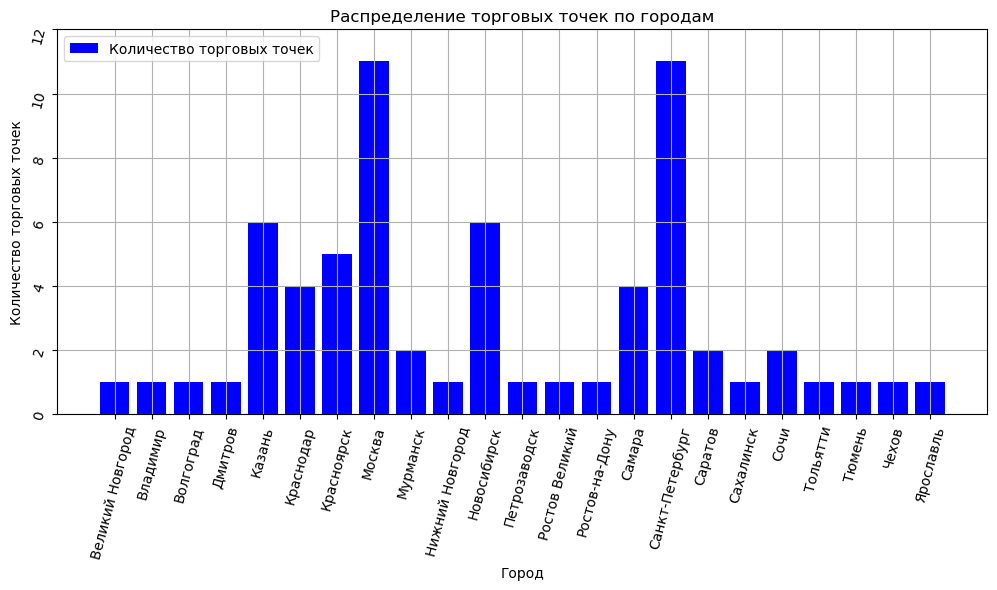

In [85]:
plt.figure(figsize=(12, 5))
plt.title('Распределение торговых точек по городам')
plt.bar(city_gr['city'], city_gr['id_trading_point'], color = 'blue', label = 'Количество торговых точек')
plt.legend(loc = 'upper left')
plt.xlabel('Город')
plt.ylabel('Количество торговых точек')
plt.tick_params(rotation=75)
plt.ylim(0,12)
plt.grid()
plt.show()


# 2. ***Объединение таблиц***
    
   

In [86]:
#####   2.1. У одного клиента может быть несколько платежей. 
#####        Постройте агрегацию таблицы с платежами, где вычислите сумму платежей на
#####        каждого клиента.

In [87]:
client_pay = df_pay.groupby('id_client').sum()['amt_payment'].reset_index()
client_pay.id_client = client_pay.id_client.astype(int)


/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/1136664659.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  client_pay = df_pay.groupby('id_client').sum()['amt_payment'].reset_index()


In [88]:
client_pay

,id_client,amt_payment
0,178561,3052.0
1,178562,2439.0
2,178563,768.0
3,178565,958.0
4,178566,5474.0
...,...,...
28595,209630,6927.0
28596,209631,2090.0
28597,209632,2775.0
28598,209633,1673.0


In [89]:
######   2.2. Соедините (по клиенту) сгруппированную таблицу с платежами с клиентской 
######       таблицей. Убедитесь, что в таблице остались все клиенты из клиентской таблицы. 

In [90]:
df_client_pay = pd.merge(df_clients, client_pay, how = 'left', on = 'id_client')


In [91]:
df_client_pay

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment
0,180844,08/06/22,0,212,5349.0
1,226069,11/07/22,1,54,NaN
2,183981,16/06/22,1,991,6322.0
3,322530,08/07/22,0,1015,NaN
4,254313,19/06/22,1,453,NaN
...,...,...,...,...,...
55351,193038,09/07/22,0,1015,5846.0
55352,244069,08/08/22,1,991,NaN
55353,189084,29/06/22,1,439,7146.0
55354,182758,13/06/22,1,573,13720.0


In [92]:
#####  2.3. Заполните нулями суммы покупок тех клиентов, которые их не совершали

In [93]:
df_client_pay['amt_payment'] = df_client_pay['amt_payment'].fillna(0)
df_client_pay['dtime_ad'] = pd.to_datetime(df_client_pay['dtime_ad'])


In [94]:
df_client_pay

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment
0,180844,2022-08-06,0,212,5349.0
1,226069,2022-11-07,1,54,0.0
2,183981,2022-06-16,1,991,6322.0
3,322530,2022-08-07,0,1015,0.0
4,254313,2022-06-19,1,453,0.0
...,...,...,...,...,...
55351,193038,2022-09-07,0,1015,5846.0
55352,244069,2022-08-08,1,991,0.0
55353,189084,2022-06-29,1,439,7146.0
55354,182758,2022-06-13,1,573,13720.0


In [95]:
#####  2.4. С помощью словаря регионов подтяните к каждой торговой точке город, 
#####       в котором она находится.

In [96]:
df_final = pd.merge(df_client_pay, df_city, on = 'id_trading_point')
df_final.amt_payment = df_final.amt_payment.astype(int)


In [97]:
df_final

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city
0,180844,2022-08-06,0,212,5349,Красноярск
1,223863,2022-08-20,0,212,0,Красноярск
2,201715,2022-07-30,1,212,4171,Красноярск
3,292010,2022-07-26,1,212,0,Красноярск
4,190438,2022-02-07,1,212,6026,Красноярск
...,...,...,...,...,...,...
55351,321313,2022-06-17,1,1002,0,Москва
55352,200856,2022-07-28,1,1002,6696,Москва
55353,198305,2022-07-22,0,1002,3901,Москва
55354,201820,2022-07-31,0,1002,0,Москва


In [98]:
#####  2.5. Создайте поле флаг платежа, который принимает значения 0 или 1 в 
#####       зависимости от того,заплатил клиент или нет.

In [99]:
df_final['nflaf_pay'] = np.where(df_final['amt_payment'] > 0,1,0)


In [100]:
df_final

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,nflaf_pay
0,180844,2022-08-06,0,212,5349,Красноярск,1
1,223863,2022-08-20,0,212,0,Красноярск,0
2,201715,2022-07-30,1,212,4171,Красноярск,1
3,292010,2022-07-26,1,212,0,Красноярск,0
4,190438,2022-02-07,1,212,6026,Красноярск,1
...,...,...,...,...,...,...,...
55351,321313,2022-06-17,1,1002,0,Москва,0
55352,200856,2022-07-28,1,1002,6696,Москва,1
55353,198305,2022-07-22,0,1002,3901,Москва,1
55354,201820,2022-07-31,0,1002,0,Москва,0


# 3. ***Автоматизация статистических вычислений***
    
   

In [101]:
#####  3.1. Создайте функцию ***test_calc***, которая будет вычислять значение 
#####       t-критерия (критерия Стьюдента) и *p_value* для сравнения средних и
#####       с помощью функции *print* выводить сообщение о том, существует ли разница
#####       между средними (на основании *p_value*)

#####       *Аргументы функции:* *r1* (первая выборка), *r2* (вторая выборка), 
#####       *alpha* (уровень значимости - имеет значение по умолчанию 5%).

In [102]:
from scipy.stats import ttest_ind, mannwhitneyu,pearsonr,spearmanr

In [103]:
def test_calc(r1, r2, alpha = 0.05):
    s, p = ttest_ind(r1, r2)
    
    if p < alpha:
        print("Гипотеза H0 не подтверждается: средние не равны")
        print("Разница средних = ", r1.mean()-r2.mean())
    else:
        print("Гипотеза H0 подтверждается: средние равны")
        print("Разница средних = 0")
    print("P_value = ",p)
    return s, p


In [104]:
#####  3.2. Создайте функцию ***mann_whitney_func***, которая будет рассчитывать 
#####       значение критерия Манна Уитни и p_value для сравнения распределений и 
#####       с помощью функции *print* выводить сообщение о том, существует ли разница
#####       между средними (на основании *p_value*)

#####       *Аргументы функции:* *r1* (первая выборка), *r2* (вторая выборка), 
#####       *alpha* (уровень значимости - имеет значение по умолчанию 5%).

In [105]:
def mann_whitney_func(r1, r2, alpha = 0.05):
    s, p = mannwhitneyu(r1, r2)
    
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    
    print("P_value = ",p)
    return s, p


# 4. ***Чистка неверно заполненных точек***
    
    

In [106]:
#####  4.1.  Создайте пустой список. Запустите цикл по всем торговым точкам и добавьте 
#####        к этому списку все торговые точки, в которых не было заплачено ни одного 
#####        рубля ни одним клиентом.

In [107]:
point_zero = []

for i in df_final['id_trading_point'].unique():
    
    df_loc = df_final[df_final['id_trading_point'] == i]
    a = df_final[(df_final['id_trading_point'] == i) & (df_final['nflag_test'] == 0)].sum()['amt_payment'].sum()
    b = df_final[(df_final['id_trading_point'] == i) & (df_final['nflag_test'] == 1)].sum()['amt_payment'].sum()
    if (a == 0) | (b == 0):
        point_zero.append(i)
        
print(point_zero)


[1015, 866, 1099, 739, 46, 228, 26, 603, 810, 800, 7, 23, 4, 1, 13]


/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/4213489361.py:6: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = df_final[(df_final['id_trading_point'] == i) & (df_final['nflag_test'] == 0)].sum()['amt_payment'].sum()
/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/4213489361.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  b = df_final[(df_final['id_trading_point'] == i) & (df_final['nflag_test'] == 1)].sum()['amt_payment'].sum()
/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588

In [108]:
#####  4.2. Создайте еще один пустой список. Запустите цикл по всем торговым точкам 
#####       и добавьте к этому списку все торговые точки, в которых пустует или 
#####       контрольная, или тестовая группа.

In [109]:
group_zero = []

for i in df_final['id_trading_point'].unique():
    
    a = df_final[(df_final['id_trading_point'] == i) & (df_final['nflag_test'] == 0)].count()['id_client']
    b = df_final[(df_final['id_trading_point'] == i) & (df_final['nflag_test'] == 1)].count()['id_client']
    if (a == 0) | (b == 0):
        group_zero.append(i)
        
print(group_zero)

[1015, 866, 1099, 739, 228, 603, 810, 800]


# 5. ***Расчет общих результатов АБ Теста***
    
    

In [110]:
#####  5.1. Отбросьте все торговые точки, которые были вами обнаружены в **пункте 4**

In [111]:
df_final = df_final[~df_final['id_trading_point'].isin(point_zero + group_zero)]


In [112]:
df_final

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,nflaf_pay
0,180844,2022-08-06,0,212,5349,Красноярск,1
1,223863,2022-08-20,0,212,0,Красноярск,0
2,201715,2022-07-30,1,212,4171,Красноярск,1
3,292010,2022-07-26,1,212,0,Красноярск,0
4,190438,2022-02-07,1,212,6026,Красноярск,1
...,...,...,...,...,...,...,...
55351,321313,2022-06-17,1,1002,0,Москва,0
55352,200856,2022-07-28,1,1002,6696,Москва,1
55353,198305,2022-07-22,0,1002,3901,Москва,1
55354,201820,2022-07-31,0,1002,0,Москва,0


In [113]:
#####  5.2. Изобразите гистограмму платежей, на которой различными цветами изображены 
#####       группы “тест” и “контроль”

<Axes: xlabel='amt_payment', ylabel='Count'>

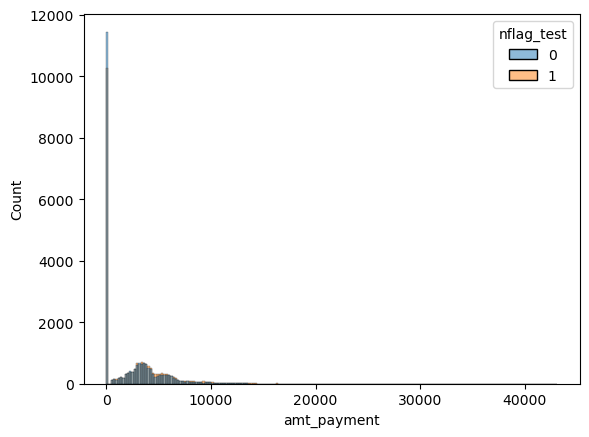

In [114]:
sns.histplot(data=df_final,x='amt_payment', hue='nflag_test')

In [115]:
#####  5.3. Примените функцию ***test_calc*** и сделайте вывод (сравниваем средние платежи)

In [116]:
print('t-test по платежам :')
test_calc(df_final[df_final['nflag_test']== 0]['amt_payment'],df_final[df_final['nflag_test']==1]['amt_payment'])


t-test по платежам :
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  -263.088912844727
P_value =  3.3214645838934018e-21


(-9.456798235171377, 3.3214645838934018e-21)

In [117]:
#####  5.4. Примените функцию ***test_calc*** и сделайте вывод (сравниваем конверсию в
#####       платеж, то есть *r1* и *r2* - это ряды нулей и единиц, в зависимости от 
#####.      того, оплатил ли что-то клиент или нет).

In [118]:
print('t-test конверсия в платеж :')
test_calc(df_final[df_final['nflag_test']== 0]['nflaf_pay'],df_final[df_final['nflag_test']==1]['nflaf_pay'])


t-test конверсия в платеж :
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  -0.043524040271688325
P_value =  1.7338073027564523e-20


(-9.282032730948323, 1.7338073027564523e-20)

In [119]:
#####  5.5. Примените функцию ***mann_whitney_func*** и сделайте вывод.

In [120]:
print('тест Манна-Уитни :')
mann_whitney_func(df_final[df_final['nflag_test']== 0]['amt_payment'],df_final[df_final['nflag_test']==1]['amt_payment'])


тест Манна-Уитни :
Распределения не равны
P_value =  3.008345273971901e-24


(243344369.0, 3.008345273971901e-24)

# 6. ***Сегментация результатов АБ Теста***
    
    

In [121]:
#####   6.1.    МОСКВА
#####   6.1.1.  Повторите аналитику из пункта 5 в отношении Москвы. Сделайте выводы.

<Axes: xlabel='amt_payment', ylabel='Count'>

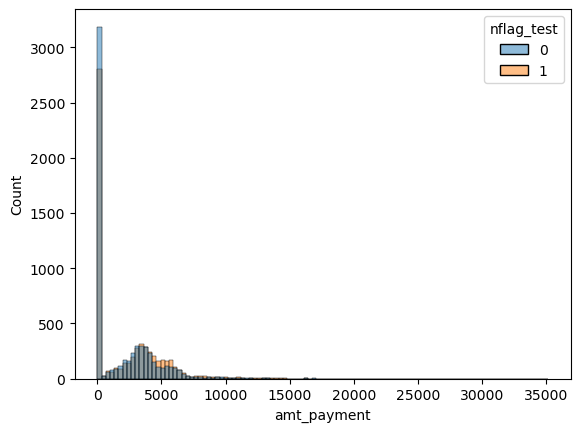

In [122]:
sns.histplot(data=df_final[df_final['city'] == 'Москва'],x='amt_payment', hue='nflag_test')

In [123]:
print('t-test по платежам :')
test_calc(df_final[df_final['city'] == 'Москва'][df_final['nflag_test']== 0]['amt_payment'],df_final[df_final['city'] == 'Москва'][df_final['nflag_test']==1]['amt_payment'])


t-test по платежам :
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  -381.7784892750842
P_value =  1.757549439555765e-14


/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/3801519791.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_calc(df_final[df_final['city'] == 'Москва'][df_final['nflag_test']== 0]['amt_payment'],df_final[df_final['city'] == 'Москва'][df_final['nflag_test']==1]['amt_payment'])


(-7.676511027843395, 1.757549439555765e-14)

In [124]:
print('t-test конверсия в платеж :')
test_calc(df_final[df_final['city'] == 'Москва'][df_final['nflag_test']== 0]['nflaf_pay'],df_final[df_final['city'] == 'Москва'][df_final['nflag_test']==1]['nflaf_pay'])


t-test конверсия в платеж :
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  -0.05557800593933432
P_value =  6.194689260032549e-10


/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/3704225984.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_calc(df_final[df_final['city'] == 'Москва'][df_final['nflag_test']== 0]['nflaf_pay'],df_final[df_final['city'] == 'Москва'][df_final['nflag_test']==1]['nflaf_pay'])


(-6.190312288026297, 6.194689260032549e-10)

In [125]:
print('тест Манна-Уитни :')
mann_whitney_func(df_final[df_final['city'] == 'Москва'][df_final['nflag_test']== 0]['amt_payment'],df_final[df_final['city'] == 'Москва'][df_final['nflag_test']==1]['amt_payment'])


тест Манна-Уитни :
Распределения не равны
P_value =  7.010591402203484e-16


/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/3994181921.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mann_whitney_func(df_final[df_final['city'] == 'Москва'][df_final['nflag_test']== 0]['amt_payment'],df_final[df_final['city'] == 'Москва'][df_final['nflag_test']==1]['amt_payment'])


(17582441.5, 7.010591402203484e-16)

In [126]:
#####   6.2.     САНКТ-ПЕТЕРБУРГ
#####   6.2.1.   Повторите аналитику из пункта 5 в отношении Санкт-Петербурга. Сделайте выводы.

<Axes: xlabel='amt_payment', ylabel='Count'>

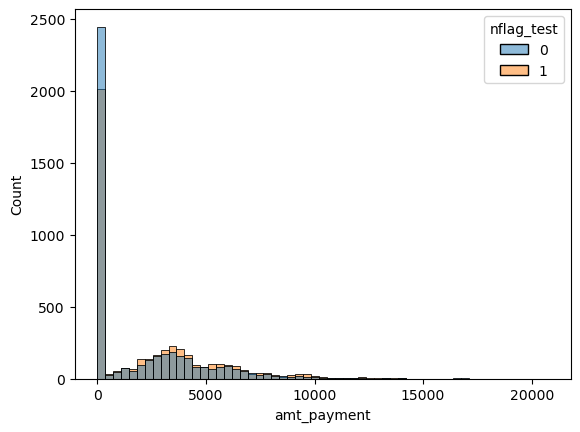

In [127]:
sns.histplot(data=df_final[df_final['city'] == 'Санкт-Петербург'],x='amt_payment', hue='nflag_test')

In [128]:
print('t-test по платежам :')
test_calc(df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']== 0]['amt_payment'],df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']==1]['amt_payment'])


t-test по платежам :
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  -513.9039043833998
P_value =  2.3198088937974163e-18


/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/351113372.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_calc(df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']== 0]['amt_payment'],df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']==1]['amt_payment'])


(-8.759635784179547, 2.3198088937974163e-18)

In [129]:
print('t-test конверсия в платеж :')
test_calc(df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']== 0]['nflaf_pay'],df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']==1]['nflaf_pay'])


t-test конверсия в платеж :
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  -0.09877797751600403
P_value =  1.065825659919673e-20


/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/280042378.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_calc(df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']== 0]['nflaf_pay'],df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']==1]['nflaf_pay'])


(-9.352468686561785, 1.065825659919673e-20)

In [130]:
print('тест Манна-Уитни :')
mann_whitney_func(df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']== 0]['amt_payment'],df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']==1]['amt_payment'])


тест Манна-Уитни :
Распределения не равны
P_value =  2.0392184217953754e-20


/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/3330341576.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mann_whitney_func(df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']== 0]['amt_payment'],df_final[df_final['city'] == 'Санкт-Петербург'][df_final['nflag_test']==1]['amt_payment'])


(8809444.5, 2.0392184217953754e-20)

In [131]:
#####   6.3.     ДРУГИЕ ГОРОДА
#####   6.3.1.   Запустите цикл по оставшимся городам. Проведите такой же анализ.

In [132]:
df_other_city = df_final[~df_final['city'].isin(['Москва', 'Санкт-Петербург'])]


In [133]:
df_other_city['city'].unique()

array(['Красноярск', 'Мурманск', 'Казань', 'Саратов', 'Тольятти',
       'Тюмень', 'Волгоград', 'Сочи', 'Владимир', 'Самара', 'Краснодар',
       'Сахалинск', 'Дмитров'], dtype=object)

<Axes: xlabel='amt_payment', ylabel='Count'>

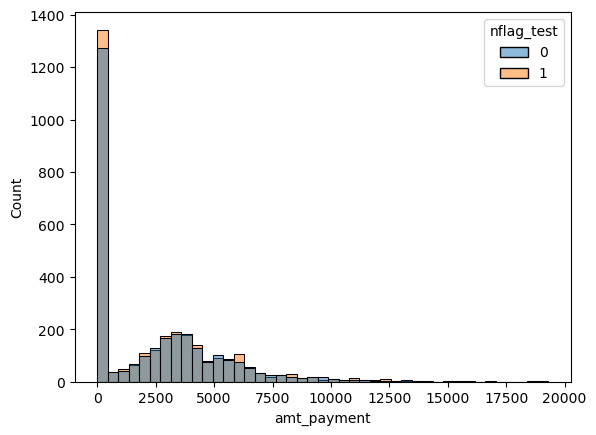

In [154]:
sns.histplot(data=df_final[df_final['city'] == 'Красноярск'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

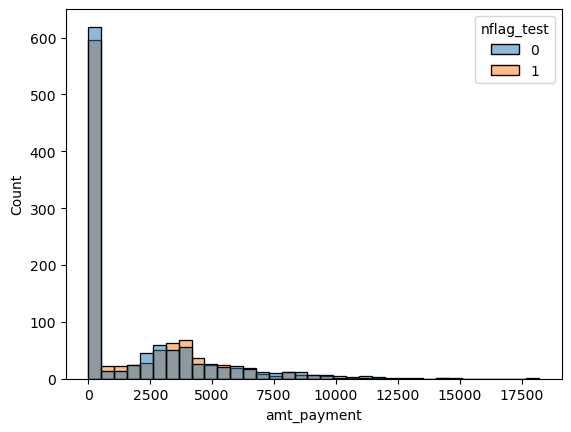

In [135]:
sns.histplot(data=df_final[df_final['city'] == 'Мурманск'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

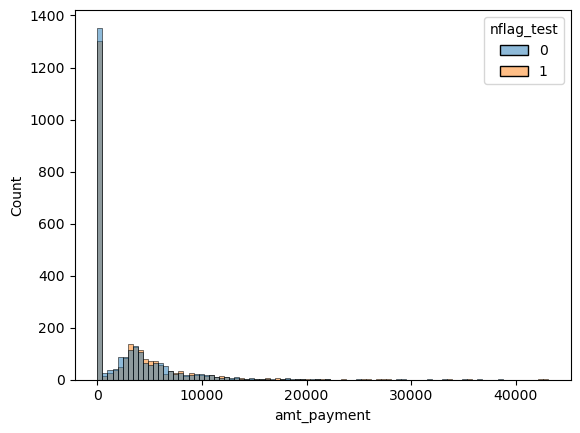

In [136]:
sns.histplot(data=df_final[df_final['city'] == 'Казань'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

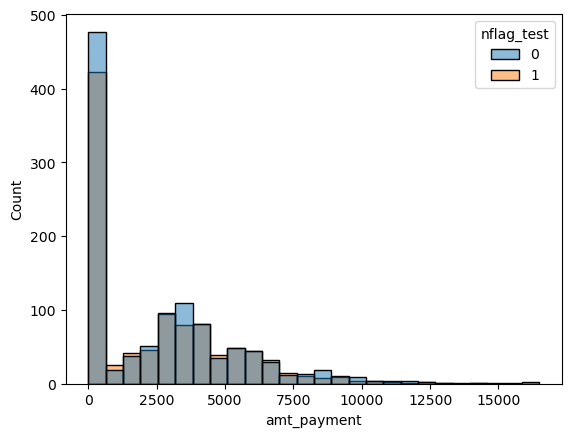

In [137]:
sns.histplot(data=df_final[df_final['city'] == 'Саратов'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

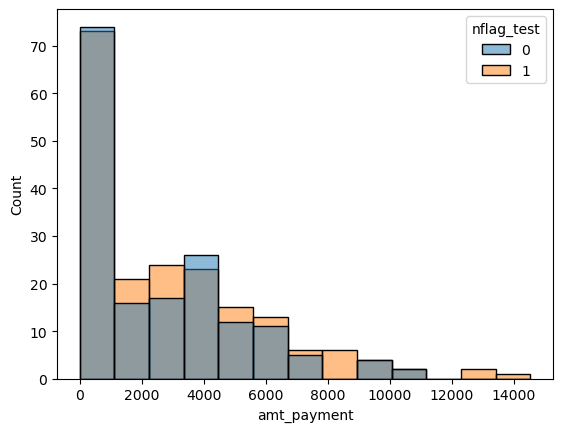

In [138]:
sns.histplot(data=df_final[df_final['city'] == 'Тольятти'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

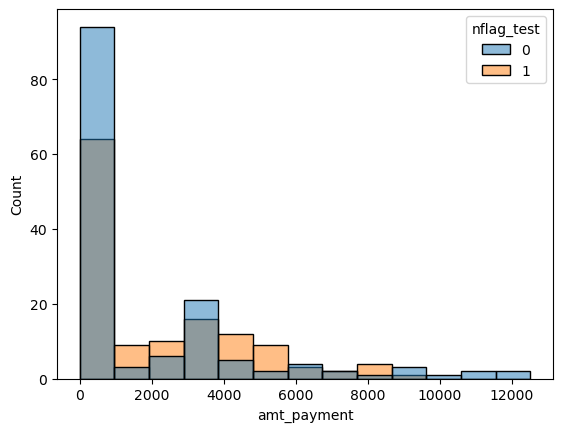

In [139]:
sns.histplot(data=df_final[df_final['city'] == 'Тюмень'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

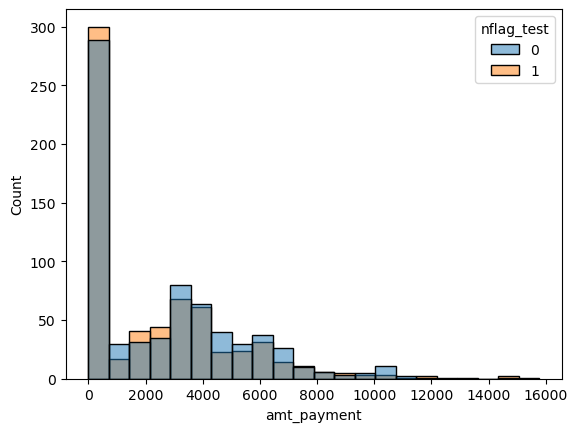

In [140]:
sns.histplot(data=df_final[df_final['city'] == 'Волгоград'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

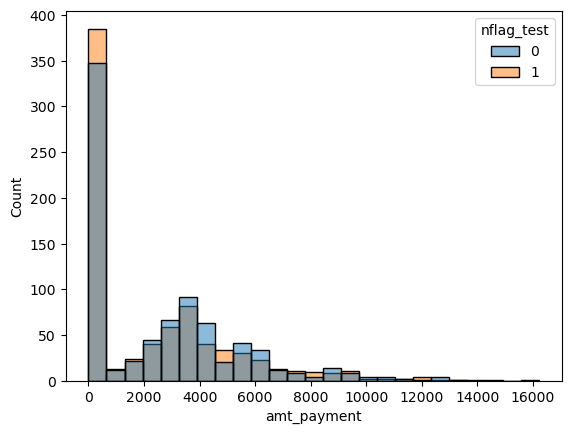

In [141]:
sns.histplot(data=df_final[df_final['city'] == 'Сочи'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

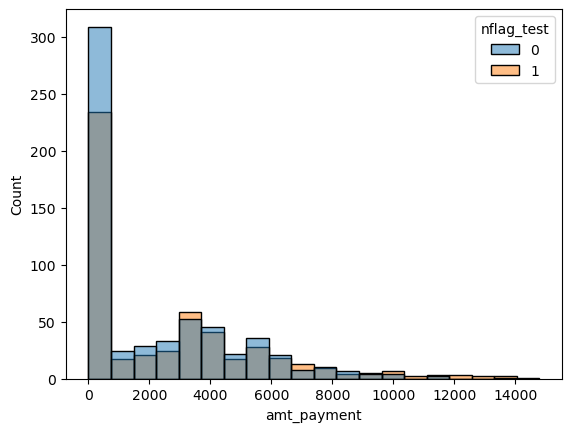

In [142]:
sns.histplot(data=df_final[df_final['city'] == 'Владимир'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

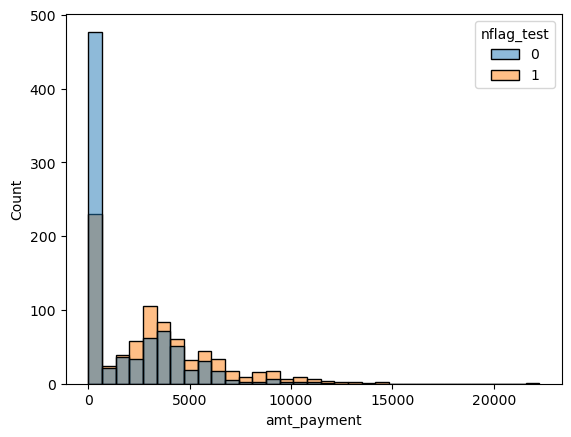

In [143]:
sns.histplot(data=df_final[df_final['city'] == 'Самара'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

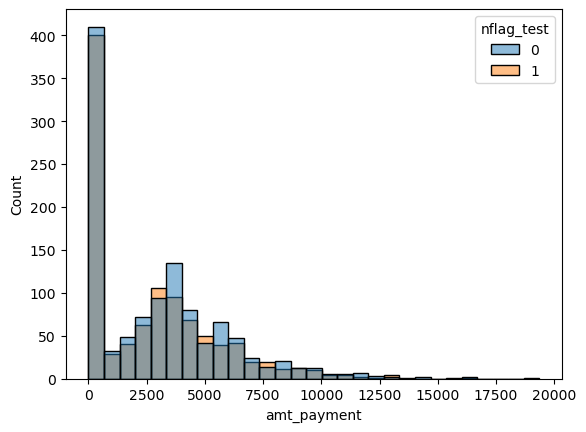

In [144]:
sns.histplot(data=df_final[df_final['city'] == 'Краснодар'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

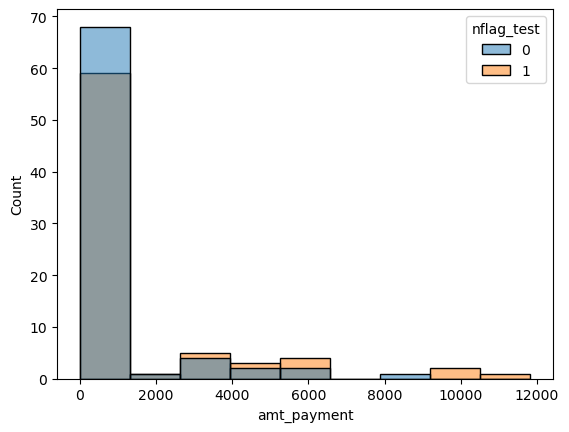

In [145]:
sns.histplot(data=df_final[df_final['city'] == 'Сахалинск'],x='amt_payment', hue='nflag_test')

<Axes: xlabel='amt_payment', ylabel='Count'>

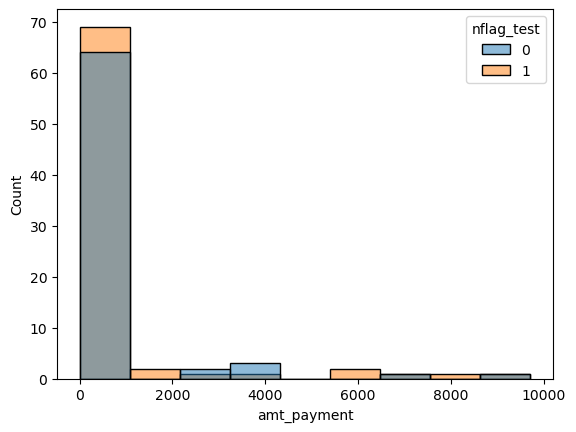

In [146]:
sns.histplot(data=df_final[df_final['city'] == 'Дмитров'],x='amt_payment', hue='nflag_test')

In [147]:
for i in df_other_city['city'].unique():
    print(i)
    print('----------')
    print('t-test по платежам :')
    test_calc(df_other_city[(df_other_city['nflag_test']== 0)&(df_other_city['city']==i)]['amt_payment'],df_other_city[(df_other_city['nflag_test']==1) & (df_other_city['city']==i)]['amt_payment'])
    print()
    print('t-test конверсия в платеж :')
    test_calc(df_other_city[(df_other_city['nflag_test']== 0)&(df_other_city['city']==i)]['nflaf_pay'],df_other_city[(df_other_city['nflag_test']==1) & (df_other_city['city']==i)]['nflaf_pay'])
    print()
    print('тест Манна-Уитни :')
    mann_whitney_func(df_other_city[(df_other_city['nflag_test']== 0)&(df_other_city['city']==i)]['amt_payment'],df_other_city[(df_other_city['nflag_test']==1) & (df_other_city['city']==i)]['amt_payment'])
    print()
    
        


Красноярск
----------
t-test по платежам :
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.9044823881233125

t-test конверсия в платеж :
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.7805336501430107

тест Манна-Уитни :
Распределения равны
P_value =  0.8770469886251647

Мурманск
----------
t-test по платежам :
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.9449762446327565

t-test конверсия в платеж :
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.3976422846466432

тест Манна-Уитни :
Распределения равны
P_value =  0.5434251528583327

Казань
----------
t-test по платежам :
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.2866880492476179

t-test конверсия в платеж :
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.784829789025573

тест Манна-Уитни :
Распределения равны
P_value =  0.37726004167062477

Саратов
----------
t-test

# 7. ***Отчет по АБ Тесту***
    
    Создайте пустой датафрейм. Запустите цикл по всем городам и торговым точкам. 
    
    Заполните для каждой торговой точки все поля, указанные в требовании к таблице. 
    
    Не забудьте задать один из трех лейблов, в зависимости от результата теста в данной торговой точке.
    
    Выгрузите полученные результаты в Excel. Разнесите результаты по трем разным листам в зависимости от лейбла.
    

In [148]:
df = pd.DataFrame()

for i in df_final['city'].unique():
    df_c = df_final[df_final['city'] == i]
    
    for j in df_c['id_trading_point'].unique():
        df_c_p = df_c[df_c['id_trading_point'] == j]
        
        count_test          = len(df_c_p[df_c_p['nflag_test'] == 1])
        count_control       = len(df_c_p[df_c_p['nflag_test'] == 0])
        count_all           = count_test + count_control
        avg_payment_test    = np.mean(df_c_p[df_c_p['nflag_test'] == 1]['amt_payment'])
        avg_payment_control = np.mean(df_c_p[df_c_p['nflag_test'] == 0]['amt_payment'])
        diff                = avg_payment_test - avg_payment_control
        sigma_test          = df_c_p[df_c_p['nflag_test'] == 1]['amt_payment'].std()
        sigma_control       = df_c_p[df_c_p['nflag_test'] == 0]['amt_payment'].std()
        s,p                 = test_calc(df_c_p[df_c_p['nflag_test'] == 1]['amt_payment'], df_c_p[df_c_p['nflag_test'] == 0]['amt_payment'])
        
        df = df.append({'city':i, 'id_trading_point':j,'count_test':count_test
                        ,'count_control':count_control, 'count_all':count_all
                        ,'avg_payment_test':avg_payment_test
                        ,'avg_payment_control':avg_payment_control, 'diff':diff
                        ,'sigma_test':sigma_test,'sigma_control':sigma_control
                        ,'ttest':s,'pvalue_ttest':p},ignore_index = True)

df['percent_count'] = df['count_all'] / df['count_all'].sum() 
df['nflag_diff'] = np.where((df['pvalue_ttest'] < 0.05) & (df['diff'] > 0), 'Положительный исход'
                            , np.where((df['pvalue_ttest'] < 0.05) & (df['diff'] < 0), 'Отрицательный исход'
                            , 'Нейтральный исход'))

print(df)

Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.6287709476405416
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.06901056074583502
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.24830826390447136
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.3808017001028424
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.3264127897793312
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.922300518333421
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.9910124894120407
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  796.2950869236583
P_value =  0.024501004890271766
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.5524803558814528
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
P_value =  0.3728909035918657
Гипотеза H0 подтверждается: средние равны
Разница сред

/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/691636211.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'city':i, 'id_trading_point':j,'count_test':count_test
/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/691636211.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'city':i, 'id_trading_point':j,'count_test':count_test
/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/691636211.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'city':i, 'id_trading_point':j,'count_test':count_test
/var/folders/v7/99sljh3d4q30g0qn9whx_nzh0000gn/T/ipykernel_28588/691636211.py:19: FutureWarning: The frame.append method is deprecated a

In [149]:
df

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,percent_count,nflag_diff
0,Красноярск,212,593,575,1168,2144.317032,2222.052174,-77.735142,2708.588724,2785.116250,-0.483585,6.287709e-01,0.025773,Нейтральный исход
1,Красноярск,278,535,489,1024,2499.345794,2185.214724,314.131070,2915.995329,2574.915597,1.820268,6.901056e-02,0.022596,Нейтральный исход
2,Красноярск,202,551,565,1116,2927.341198,2730.378761,196.962437,2956.686241,2737.885785,1.155073,2.483083e-01,0.024626,Нейтральный исход
3,Красноярск,444,650,562,1212,2404.106154,2545.734875,-141.628722,2810.828487,2797.138764,-0.876740,3.808017e-01,0.026744,Нейтральный исход
4,Красноярск,277,708,709,1417,2285.750000,2431.365303,-145.615303,2712.677878,2868.587569,-0.981705,3.264128e-01,0.031268,Нейтральный исход
5,Мурманск,54,633,640,1273,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.097556,9.223005e-01,0.028090,Нейтральный исход
6,Мурманск,55,422,425,847,2109.106635,2111.272941,-2.166306,2790.993385,2804.223188,-0.011268,9.910125e-01,0.018690,Нейтральный исход
7,Казань,991,270,294,564,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,2.450100e-02,0.012445,Положительный исход
8,Казань,699,482,494,976,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594254,5.524804e-01,0.021537,Нейтральный исход
9,Казань,477,382,386,768,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.891593,3.728909e-01,0.016947,Нейтральный исход


In [150]:
df_1 = df[df['nflag_diff'] == 'Положительный исход']
df_2 = df[df['nflag_diff'] == 'Отрицательный исход']
df_3 = df[df['nflag_diff'] == 'Нейтральный исход']

In [151]:
import xlsxwriter

In [152]:
writer =  pd.ExcelWriter('AB тест', engine="xlsxwriter")

df_1.to_excel(writer, sheet_name = 'Положительный исход')
df_2.to_excel(writer, sheet_name = 'Отрицательный исход')
df_3.to_excel(writer, sheet_name = 'Нейтральный исход')

writer.close()